# Data Visualization with Python - Week 3

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline
plt.style.use("seaborn-v0_8-darkgrid")

In [21]:
stock_df = pd.read_csv("./stockprices.csv")
stock_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


### How did the closing stockprice of the below 5 companies, vary over time?

In [22]:
stock_df["Name"].unique()

array(['AAPL', 'AMZN', 'FB', 'GOOGL', 'MSFT'], dtype=object)

In [31]:


fig = go.Figure()


for name in stock_df['Name'].unique():
    subset = stock_df[stock_df['Name'] == name]
    fig.add_trace(go.Scatter(x=subset['date'], y=subset['close'], mode='lines', name=name))

fig.update_layout(title='Closing Price Over Time')

fig.show()

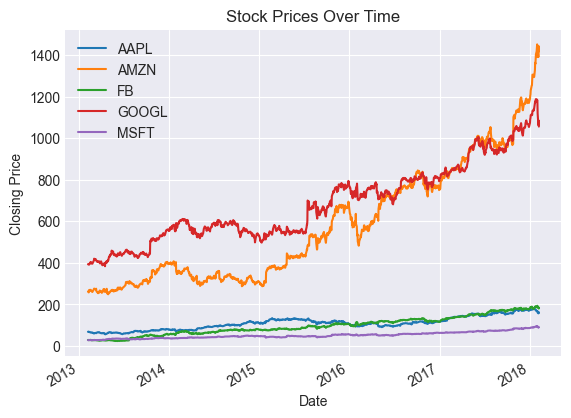

In [24]:
stock_df['date'] = pd.to_datetime(stock_df['date'])


stock_df.set_index('date', inplace=True)

for name in stock_df['Name'].unique():
    stock_df[stock_df['Name'] == name]['close'].plot(label=name)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

#### The above graph displays the changes in the stock prices over time for the given 5 companies in the dataset. The horizontal axis represents the date and the vertical is the closing price on that date. The prices of amazon and google have grown at the rapid pace while others have remained low. Let us further dig into that.

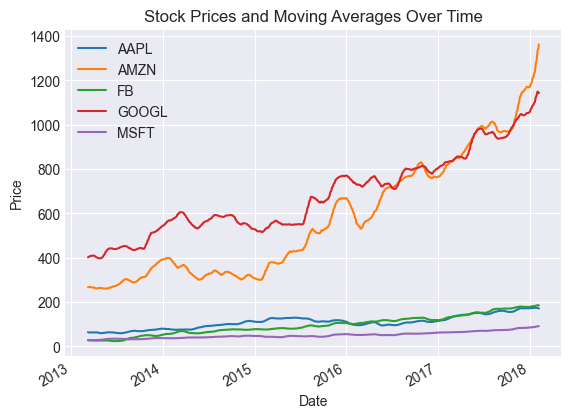

In [25]:
window_size = 20 

for name in stock_df['Name'].unique():
    stock_df[stock_df['Name'] == name]['close'].rolling(window=window_size).mean().plot(label=f'{name}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices and Moving Averages Over Time')
plt.legend()
plt.show()


#### This is a more simpler and smoother graph as compared to above.

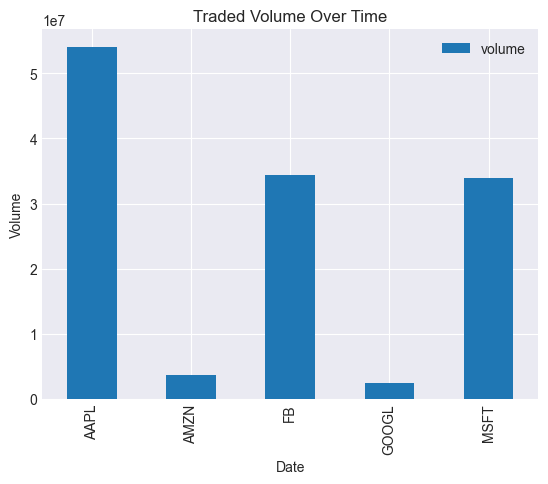

In [26]:
window_size = 365

stock_df.groupby("Name").aggregate({"volume":"mean"}).plot(kind='bar', label=f'{name}')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Traded Volume Over Time')
plt.legend()
plt.show()

#### This shows that the stocks which are traded at a higher volume tend to have lower closing prices.

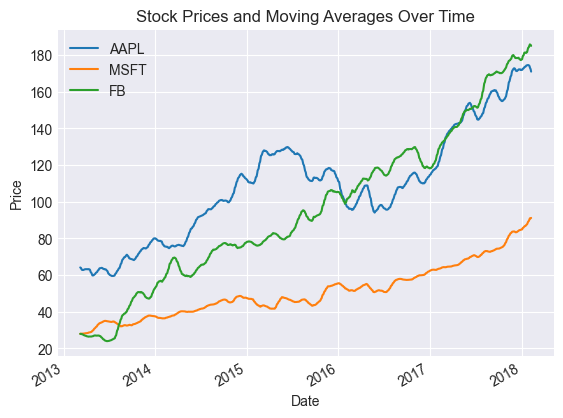

In [27]:
window_size = 20 

for name in ["AAPL", "MSFT", "FB"]:
    stock_df[stock_df['Name'] == name]['close'].rolling(window=window_size).mean().plot(label=f'{name}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices and Moving Averages Over Time')
plt.legend()
plt.show()


#### Isolating those ones which seemed to be flat in the above graph, we can see that it was due to the high difference in price with the other two, here we can see that they're growing at a reasonable pace too.

In [28]:
stock_df.reset_index(inplace=True)
stock_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [29]:
stock_df['year'] = stock_df['date'].dt.year
annual_mean = stock_df.groupby(['Name', 'year'])['close'].mean().reset_index()

annual_mean['growth_rate'] = annual_mean.groupby('Name')['close'].pct_change() * 100

annual_mean = annual_mean.dropna()
annual_mean.head()

,Name,year,close,growth_rate
1,AAPL,2014,92.264531,37.221141
2,AAPL,2015,120.039861,30.104018
3,AAPL,2016,104.604008,-12.858940
4,AAPL,2017,150.585080,43.957275
5,AAPL,2018,171.594231,13.951682


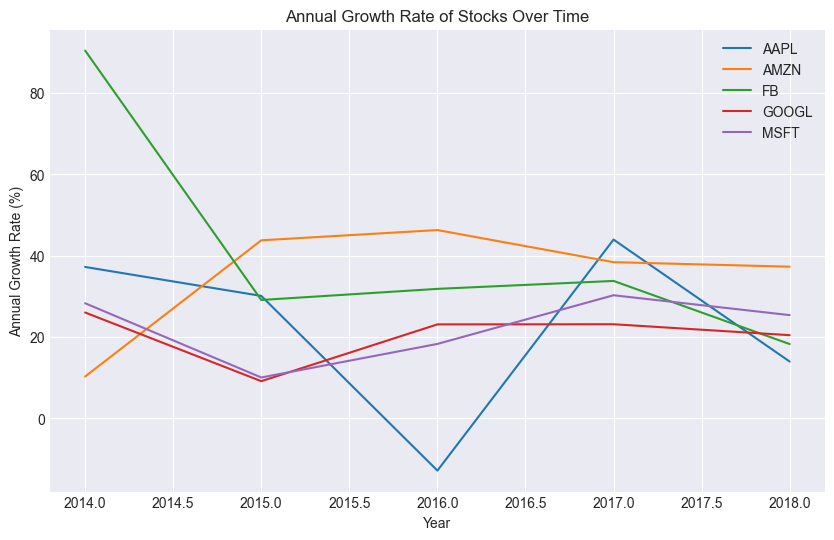

In [30]:
names = annual_mean['Name'].unique()

plt.figure(figsize=(10,6))

for name in names:
    subset = annual_mean[annual_mean['Name'] == name]
    
    plt.plot(subset['year'], subset['growth_rate'], label=name)

plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate of Stocks Over Time')
plt.legend()

plt.show()

#### On evaluating the annual growth rate of stocks over time, we can see that from 2017, every company has had a subdued growth rate where AAPL has especially abruptly fallen down following its rapid growth from 2016.